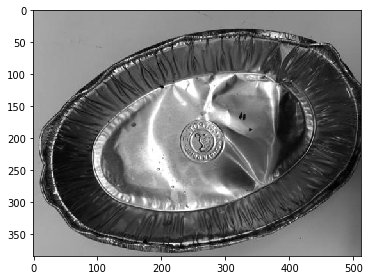

In [2]:
from skimage.io import imread, imshow
import matplotlib.pyplot as plt

# double dash to avoid syntax error
image = imread("C:/Users/Blobby/Desktop/metal/metal120.jpg", as_gray=True)
imshow(image)
plt.show()

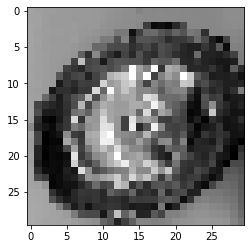

In [3]:
import cv2
resizedImg = cv2.resize(image,(30,30))
plt.imshow(resizedImg, cmap = 'gray')
plt.show()

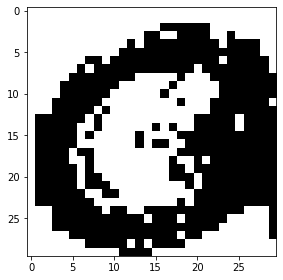

In [4]:
from skimage.filters import threshold_otsu
threshold_value = threshold_otsu(resizedImg)
img_threshold = resizedImg > threshold_value
imshow(img_threshold)
plt.show()

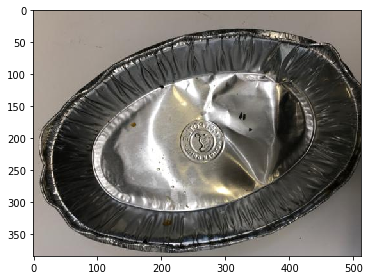

In [5]:
from skimage.io import imread, imshow
import matplotlib.pyplot as plt

# double dash to avoid syntax error
imageColored = imread("C:/Users/Blobby/Desktop/metal/metal120.jpg")
imshow(imageColored)
plt.show()

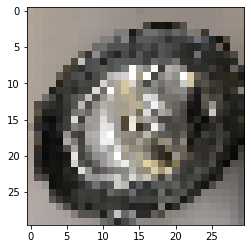

In [6]:
import cv2
resizedImgColor = cv2.resize(imageColored,(30,30))
plt.imshow(resizedImgColor, cmap = 'gray')
plt.show()

In [7]:
# get index value of False values
indxArr = []
indxArrAll = []

for indx0 in range(img_threshold.shape[0]):
    for indx1 in range(img_threshold.shape[1]):
        if img_threshold[indx0][indx1] == False:
            if indx1 < 29:
                if img_threshold[indx0][indx1 + 1] == True:
                    indxArr.append(indx1 + 1)
    indxArrAll.append(indxArr)    
    indxArr = []
print(indxArrAll)

[[], [], [22], [16, 22, 25], [13, 23, 28], [28], [9, 23, 29], [7, 20, 29], [13, 19], [11, 18], [10, 17], [9, 19, 29], [8, 10], [7, 9, 25], [6, 9, 16, 18, 25], [6, 8, 14], [6, 14, 17], [5, 8], [5, 8, 18, 21], [6, 8, 19], [6, 9, 20], [6, 10, 20], [7, 11], [8, 19], [9, 12, 26], [14, 18, 24], [23], [18, 21], [12, 14, 19], [15]]


In [8]:
#get white values
whiteVal = []
rgb = ""

for first in range(len(indxArrAll)):
    for second in range(len(indxArrAll[first])):
        for rgbIndx in range(3):
            rgb += str(resizedImgColor[first][indxArrAll[first][second]][rgbIndx])
        # convert rgb to int
        whiteVal.append(int(rgb))
        rgb = ""
print(whiteVal)

[145139133, 111111111, 131126116, 147138133, 133133135, 114114116, 146136127, 142132123, 139141140, 112112110, 138128119, 194193189, 114113111, 136126117, 123123121, 182174172, 182181179, 139134123, 212210211, 141137134, 221217216, 130127122, 132129124, 196191190, 153149141, 188182181, 142139134, 150145141, 120117110, 157154147, 220219217, 169168166, 204200197, 220217213, 162157154, 230225219, 130129124, 240236224, 242241238, 147143140, 174170168, 173168165, 163160159, 150139117, 137132126, 169165163, 124123121, 11811085, 232228227, 144143141, 153144140, 208208205, 151151151, 13211988, 224223222, 118115115, 155152156, 125124120, 112112114, 204203199, 115111108, 109109109, 108109104, 127124119, 133129120, 123128125, 119118113, 195194199, 136138144, 135132123, 138137133]


In [9]:
# get the brightest color within the area
whiteVal.sort()
print("Largest element is: ", whiteVal[-1])

Largest element is:  242241238


In [10]:
# number of values above 200200200
countOfWhite = 0
for values in range(len(whiteVal)):
    if whiteVal[values] > 200200200:
        countOfWhite += 1

print(str(countOfWhite) +" out of " + str(len(whiteVal)))

12 out of 71


In [12]:
# color values within the area with similar values
indxArrColor = []
intStr = ""
for indx0 in range(img_threshold.shape[0]):
    for indx1 in range(img_threshold.shape[1]):
        if img_threshold[indx0][indx1] == False:
            for indx2 in range(3):
                intStr += str(resizedImgColor[indx0][indx1][indx2])
            indxArrColor.append(int(intStr))
            intStr = ""
            
print(len(indxArrColor))

446


In [17]:
# total number of colors without similar values
arr = []
def combRGB(indxArrColor):
    for indx in range(0, len(indxArrColor)):
        if stackRGB(indxArrColor[indx], arr) == False:
            arr.append(indxArrColor[indx])

def stackRGB(colorArr, arr):
    for indx in range(len(arr)):
        if arr[indx] == colorArr:
            return True
    return False

combRGB(indxArrColor)
numOfColors = len(arr)
print(numOfColors)

397


In [19]:
# color that appears the most within the area
from scipy.stats import mode
modeColor = int(mode(indxArrColor).mode)
print(int(mode(indxArrColor).mode))

151513


In [27]:

features += [countOfWhite,  whiteVal[-1], modeColor, numOfColors]
print(features)


[12, 242241238, 151513, 397]


In [28]:
features = []